In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

In [3]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from itertools import combinations

In [4]:
# Testing
audio_path = 'C:/Users/ASUS/Desktop/projects/archive/Data/genres_original/hiphop/hiphop.00000.wav'
x , sr = librosa.load(audio_path)
print(type(x), type(sr))

<class 'numpy.ndarray'> <class 'int'>


(661504,) 22050


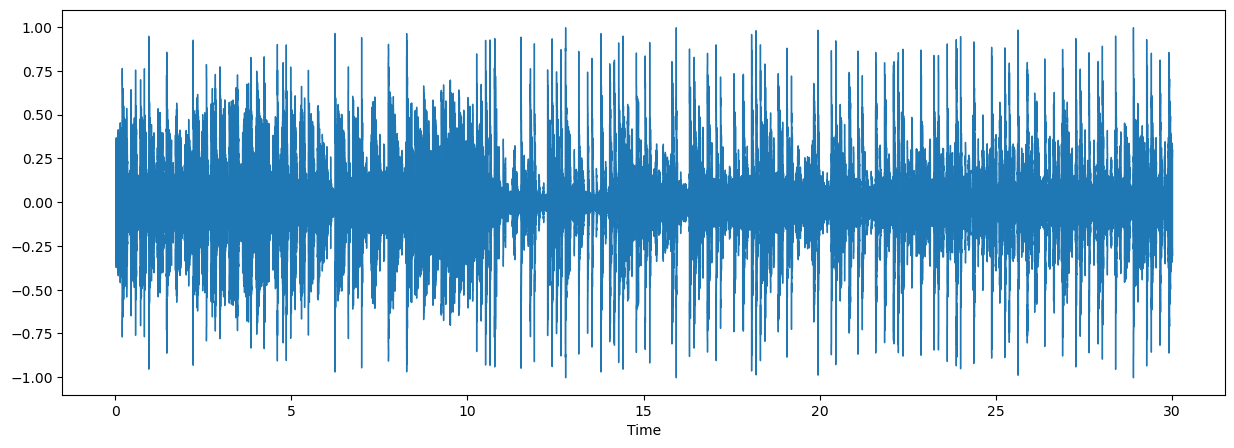

In [5]:
print(x.shape, sr)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(x, sr=sr)

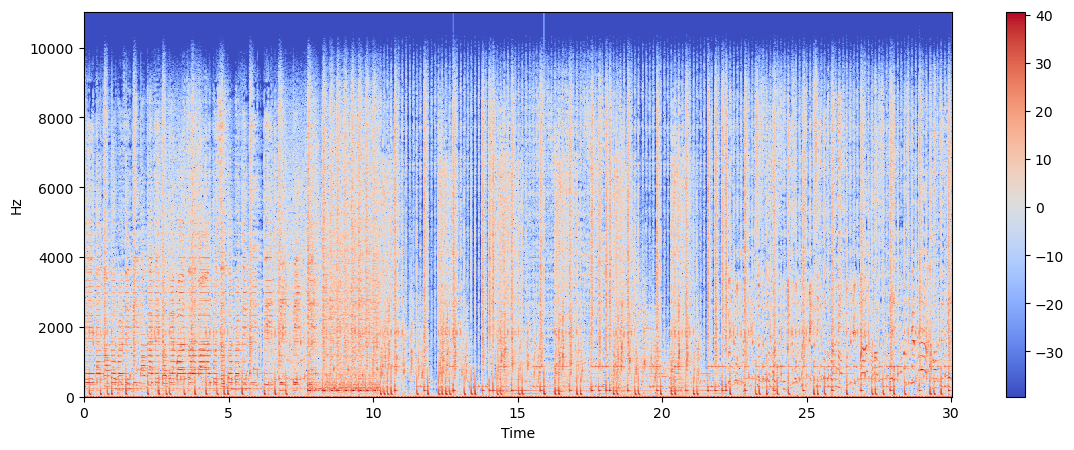

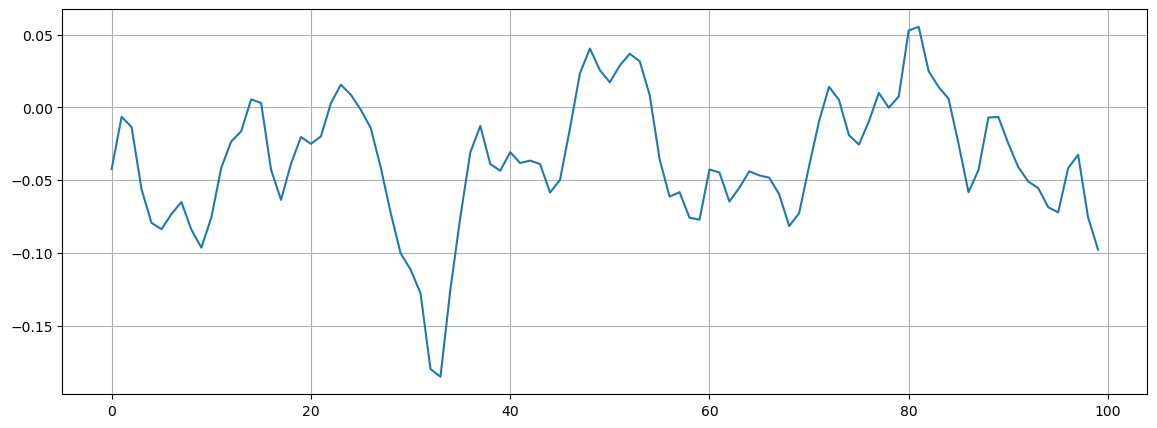

In [6]:
# Converting the song into an image using Spectrogram
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

#Zero crossings sum plot
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()


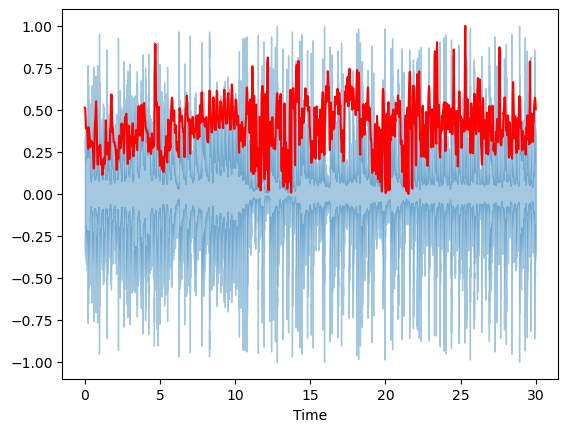

In [7]:
#Spectral centroid plot
import sklearn

spectral_centroids = librosa.feature.spectral_centroid(y=x, sr=sr)[0]
spectral_centroids.shape
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)


# Feature extraction function
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

In [8]:
# Function to calculate zero crossings in a segment of audio
def zero_cross(x):
    n0 = 9000
    n1 = 9100
    zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
    return sum(zero_crossings)

In [9]:
# Function to calculate the spectral centroid and its corresponding time
def spec_center(x, sr):
    spectral_centroids = librosa.feature.spectral_centroid(y=x, sr=sr)[0]
    frames = range(len(spectral_centroids))
    t = librosa.frames_to_time(frames, sr=sr)
    ma = max(spectral_centroids)
    return t[np.where(spectral_centroids == ma)[0][0]]



In [10]:
#import os
#genre = os.listdir('C:/Users/ASUS/Desktop/projects/archive/Data/genres_original/')
#print(genre)
genre = ['hiphop', 'pop']

In [11]:
li = []
path = 'C:/Users/ASUS/Desktop/projects/archive/Data/genres_original/'

In [12]:
import librosa
for gen in genre:
    for song in os.listdir(os.path.join(path, gen)):
        x, sr = librosa.load(os.path.join(path, gen, song))
        # Extract features: zero crossings, spectral centroid, and genre
        li.append([zero_cross(x), round(spec_center(x, sr), 2), gen])


In [13]:
li = np.array(li)
X = li[:, 0:2]
y = li[:, 2]

In [14]:
# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [36]:
# Training the KNN model
knn = KNeighborsClassifier(n_neighbors=6)  
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [37]:
# Making predictions on the test set
y_pred = knn.predict(X_test)


In [38]:
# Evaluating the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.675


In [39]:
# Testing for a custom song
path_custom = 'C:/Users/ASUS/Desktop/projects/archive/Data/genres_original/pop/pop.00010.wav'
x_custom, sr_custom = librosa.load(path_custom)
prediction_custom = knn.predict(np.array([[zero_cross(x_custom), round(spec_center(x_custom, sr_custom), 2)]]))
print(f"Prediction for custom song: {prediction_custom}")

Prediction for custom song: ['pop']


In [40]:
import IPython

# playing an audio file
def play_audio(file_path):
    x, sr = librosa.load(file_path)
    return IPython.display.Audio(x, rate=sr)


play_audio(path_custom)


In [41]:
# Finding the best pair with more accuracy

def accuracy(genre):
    li = []
    for gen in genre:
        for song in os.listdir(os.path.join(path, gen)):
            x, sr = librosa.load(os.path.join(path, gen, song))
            # Extracting features: zero crossings, spectral centroid, and genre
            li.append([zero_cross(x), round(spec_center(x, sr), 2), gen])
    li = np.array(li)
    X = li[:, 0:2]
    y = li[:, 2]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    knn = KNeighborsClassifier(n_neighbors=5)  
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    return round(accuracy_score(y_test, y_pred), 2)

In [42]:
#calculating how well the model distinguishes between various genres
genre_pair = ['blues', 'metal']
print(f"{genre_pair[0]} vs {genre_pair[1]} accuracy: {accuracy(genre_pair)}")

blues vs metal accuracy: 0.75


In [43]:
genre_pair1 = ['pop', 'hiphop']
print(f"{genre_pair1[0]} vs {genre_pair1[1]} accuracy: {accuracy(genre_pair1)}")

pop vs hiphop accuracy: 0.57
